<a href="https://colab.research.google.com/github/samiraeshraghi/6220-project/blob/main/Samira_Eshraghi_INSE6220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**


**Install Pycaret**

In [196]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret

In [3]:
!pip install shap
!pip install numba==0.53
!pip install pca
!pip install statsmodels --upgrade
!pip install library==version_number
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 7.4 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 0.52.0 Requires-Python >=3.6,<3.9; 0.52.0rc3 Requires-Python >=3.6,<3.9; 0.53.0 Requires-Python >=3.6,<3.10; 0.53.0rc1.post1 Requires-Python >=3.6,<3.10; 0.53.0rc2 Requires-Python >=3.6,<3.10; 0.53.0rc3 Requires-Python >=3.6,<3.10; 0.53.1 Requires-Python >=3.6,<3.10; 0.54.0 Requires-Python >=3.7,<3.10; 0.54.0rc2 Requires-Python >=3.7,<3.10; 0.54.0rc3 Requires-Python >=3.7,<3.10; 0.54.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement numba==0.53 (from versions: 0.1, 0.2, 0.3, 0.5.0, 0.6.0, 0.7.0, 0.7.1, 0.7.2, 0.8.0, 0.8.1, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.12.2, 0.13.0, 0.13.2, 0.13.3, 0.13.4, 0.14.0, 0.15.1, 0.16.0, 0.17.0, 0.18.1, 0.18.2, 0.19.1, 0.19.2, 0.20.0, 0.21.0, 0.22.0, 0.22.1, 0.23.0, 0.23.1, 0.24.0, 0.25.0, 0.26.0, 0.27.0, 0.28.1, 0.29.0, 0.30.0, 0.30.1, 0.31

In [197]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.3.2'

In [198]:
import shap
import numba
import pandas as pd
import sys
print(sys.modules['pandas'])

<module 'pandas' from '/usr/local/lib/python3.10/dist-packages/pandas/__init__.py'>


**Import Libraries**

In [199]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [200]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.0.3
Seaborn version:  0.13.1


**Dataset**

Additional Information

The dataset was acquired and annotated by professional physicians at 'Hospital Universitario de Caracas'.
The subjective judgments (target variables) were originally done in an ordinal manner (poor, fair, good, excellent) and was discretized in two classes (bad, good).
Images were randomly sampled from the original colposcopic sequences (videos).
The original images and the manual segmentations are included in the 'images' directory.


Additional Variable Information

rgb_total_r_mean: average color information in the image (B channel).
rgb_total_r_std: stddev color information in the image (R channel).
rgb_total_r_mean_minus_std: (avg - stddev) color information in the image (R channel).
rgb_total_r_mean_plus_std: (avg + stddev) color information in the image (R channel).
rgb_total_g_mean: average color information in the image (G channel).
rgb_total_g_std: stddev color information in the image (G channel).
class: two classes bad = 0, good = 1
https://archive.ics.uci.edu/dataset/384/quality+assessment+of+digital+colposcopies

In [201]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/samiraeshraghi/6220-Project/main/MyDataset.csv')
df.head(25)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   87524       442.246011       253.291155      0.819738       90546   
1   75166       406.690687       243.032436      0.801805       78789   
2   90856       442.267048       266.328318      0.798354       93717   
3   45928       286.540559       208.760042      0.684989       47336   
4   79408       352.190770       290.827533      0.564011       81463   
5   49242       318.125407       200.122120      0.777351       51368   
6   42492       310.146072       176.131449      0.823099       43904   
7   60952       332.455472       235.429835      0.706058       62329   
8   42256       323.189607       172.575926      0.845499       44743   
9   64380       366.964842       227.771615      0.784056       66125   
10  80437       449.454581       232.325506      0.856043       84460   
11  43725       301.322218       186.950629      0.784258       45021   
12  43441       276.610829       201.813135      0.683882       45133   
13  76792       338.857545       291.359202      0.510584       78842   
14  74167       387.798931       247.858123      0.769090       76807   
15  33565       261.554331       167.708491      0.767374       35794   
16  64670       403.083975       206.484644      0.858829       66419   
17  64762       354.293940       235.752463      0.746474       66713   
18  43295       304.284467       182.811037      0.799407       44714   
19  70699       418.698572       216.596054      0.855799       72363   
20  69726       354.176912       252.529208      0.701161       71849   
21  57346       330.478438       222.443748      0.739555       59365   
22  82028       397.114976       268.333773      0.737169       84427   
23  61251       301.507790       273.659941      0.419754       64732   
24  96277       447.134523       275.216154      0.788128       97865   

      Extent  Perimeter  class  
0   0.758651   1184.040      0  
1   0.684130   1121.786      0  
2   0.637613   1208.575      0  
3   0.699599    844.162      0  
4   0.792772   1073.251      0  
5   0.658456    881.836      0  
6   0.665894    823.796      0  
7   0.743598    933.366      0  
8   0.698031    849.728      0  
9   0.664376    981.544      0  
10  0.674236   1176.305      0  
11  0.697068    818.873      0  
12  0.690856    803.748      0  
13  0.772322   1042.770      0  
14  0.680182   1084.729      0  
15  0.681551    751.413      0  
16  0.756773   1028.445      0  
17  0.694998    981.509      0  
18  0.713838    814.680      0  
19  0.728075   1061.321      0  
20  0.734399   1035.501      0  
21  0.723609    928.272      0  
22  0.686375   1106.355      0  
23  0.643596    971.769      0  
24  0.704057   1181.921      0

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [203]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [204]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

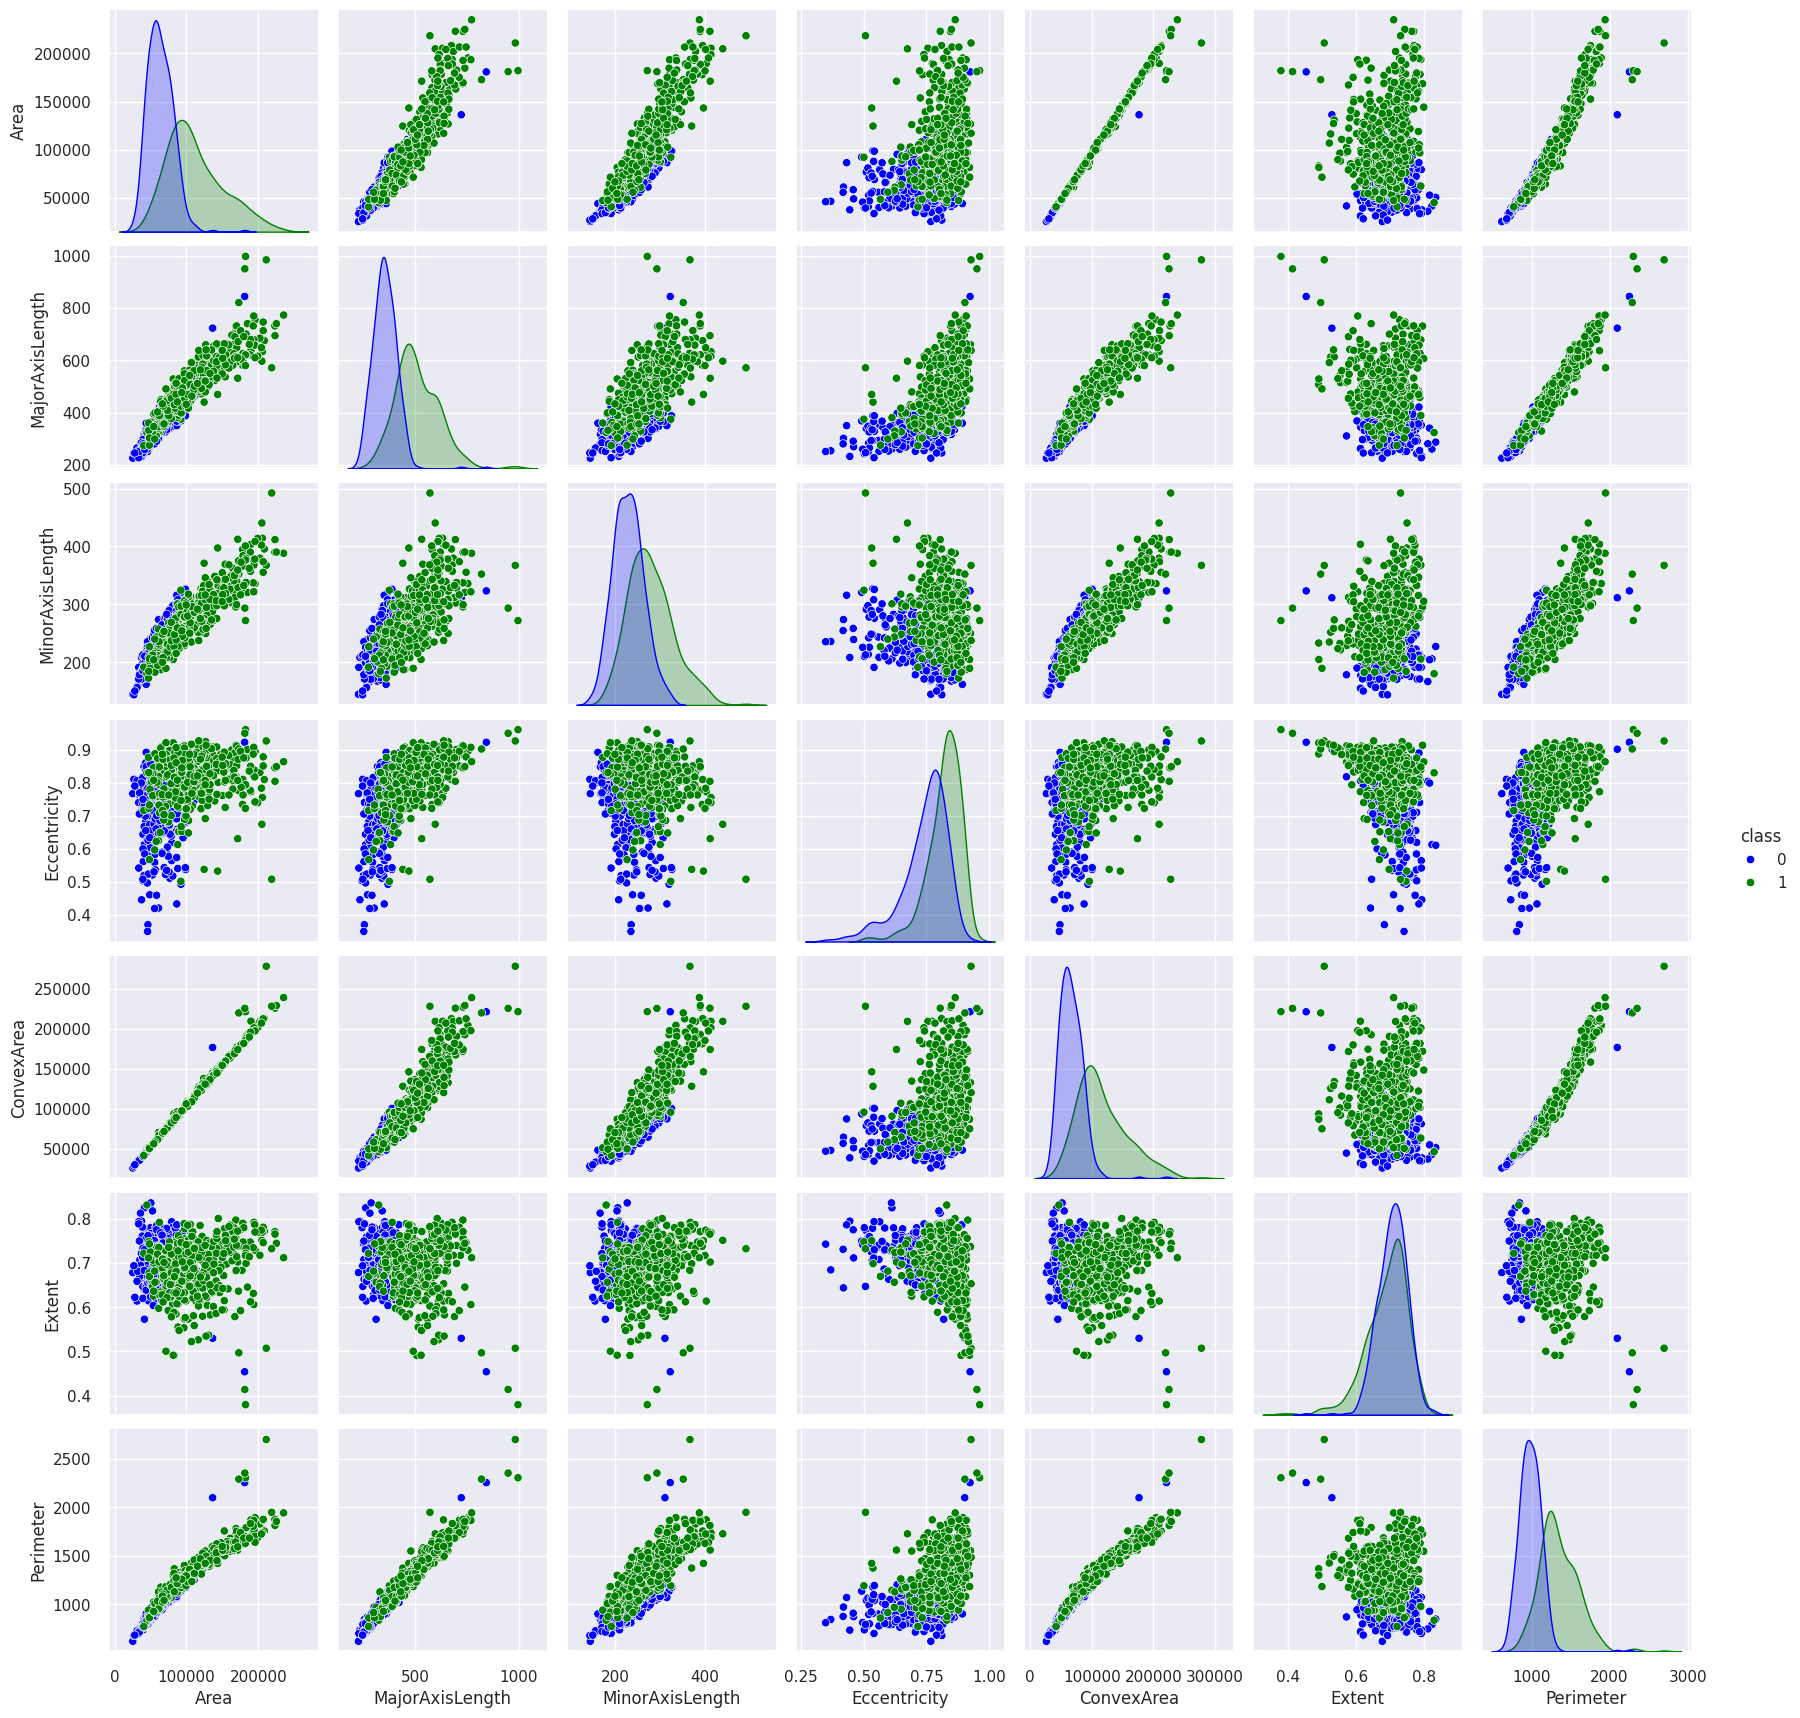

In [205]:
custom_palette = ['blue', 'green', 'red']
sns.pairplot(df, hue='class', palette=custom_palette)
plt.show()

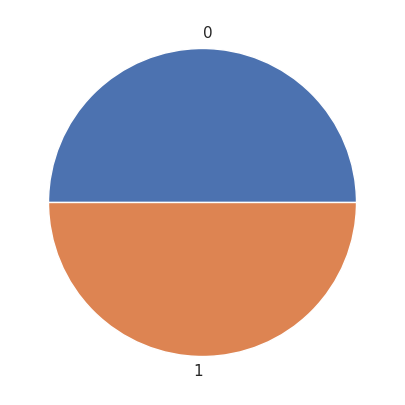

In [206]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [207]:
X = df.drop(columns=['class'])
X.head(10)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   
5  49242       318.125407       200.122120      0.777351       51368   
6  42492       310.146072       176.131449      0.823099       43904   
7  60952       332.455472       235.429835      0.706058       62329   
8  42256       323.189607       172.575926      0.845499       44743   
9  64380       366.964842       227.771615      0.784056       66125   

     Extent  Perimeter  
0  0.758651   1184.040  
1  0.684130   1121.786  
2  0.637613   1208.575  
3  0.699599    844.162  
4  0.792772   1073.251  
5  0.658456    881.836  
6  0.665894    823.796  
7  0.743598    933.366  
8  0.698031    849.728  
9  0.664376    981.544

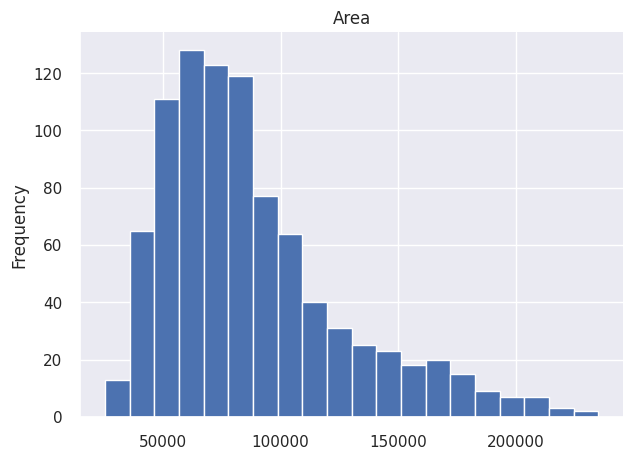

In [208]:
# @title Area

from matplotlib import pyplot as plt
X['Area'].plot(kind='hist', bins=20, title='Area')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [209]:
X.describe().transpose()

count          mean           std           min  \
Area             900.0  87804.127778  39002.111390  25387.000000   
MajorAxisLength  900.0    430.929950    116.035121    225.629541   
MinorAxisLength  900.0    254.488133     49.988902    143.710872   
Eccentricity     900.0      0.781542      0.090318      0.348730   
ConvexArea       900.0  91186.090000  40769.290132  26139.000000   
Extent           900.0      0.699508      0.053468      0.379856   
Perimeter        900.0   1165.906636    273.764315    619.074000   

                          25%           50%            75%            max  
Area             59348.000000  78902.000000  105028.250000  235047.000000  
MajorAxisLength    345.442898    407.803951     494.187014     997.291941  
MinorAxisLength    219.111126    247.848409     279.888575     492.275279  
Eccentricity         0.741766      0.798846       0.842571       0.962124  
ConvexArea       61513.250000  81651.000000  108375.750000  278217.000000  
Extent               0.670869      0.707367       0.734991       0.835455  
Perimeter          966.410750   1119.509000    1308.389750    2697.753000

**Standardize the Data**

In [210]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0 -0.007186         0.097577        -0.023958      0.423142   -0.015709   
1 -0.324217        -0.209012        -0.229292      0.224476   -0.304248   
2  0.078292         0.097758         0.236988      0.186239    0.062113   
3 -1.074286        -1.245051        -0.915273     -1.069623   -1.076165   
4 -0.215393        -0.678958         0.727354     -2.409827   -0.238623   
5 -0.989269        -0.972699        -1.088166     -0.046427   -0.977212   
6 -1.162433        -1.041504        -1.568353      0.460367   -1.160393   
7 -0.688862        -0.849133        -0.381463     -0.836226   -0.708208   
8 -1.168487        -0.929031        -1.639519      0.708518   -1.139802   
9 -0.600920        -0.551563        -0.534746      0.027845   -0.615047   

     Extent  Perimeter  
0  1.106743   0.066274  
1 -0.287777  -0.161252  
2 -1.158250   0.155945  
3  0.001711  -1.175915  
4  1.745259  -0.338639  
5 -0.768202  -1.038224  
6 -0.629029  -1.250349  
7  0.825066  -0.849891  
8 -0.027639  -1.155572  
9 -0.657433  -0.673810

In [211]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Area             900.0  1.894781e-16  1.000556 -1.601242 -0.730010 -0.228374   
MajorAxisLength  900.0  0.000000e+00  1.000556 -1.770279 -0.737144 -0.199413   
MinorAxisLength  900.0 -8.210716e-16  1.000556 -2.217269 -0.708091 -0.132898   
Eccentricity     900.0  6.947529e-16  1.000556 -4.794739 -0.440641  0.191694   
ConvexArea       900.0  6.315935e-17  1.000556 -1.596379 -0.728228 -0.234009   
Extent           900.0  1.436875e-15  1.000556 -5.981678 -0.535921  0.147067   
Perimeter        900.0 -6.315935e-17  1.000556 -1.998568 -0.729119 -0.169574   

                      75%       max  
Area             0.441866  3.777353  
MajorAxisLength  0.545458  4.883667  
MinorAxisLength  0.508404  4.759444  
Eccentricity     0.676084  2.000508  
ConvexArea       0.421867  4.590095  
Extent           0.664006  2.543983  
Perimeter        0.520748  5.598604

**Observations and variables**

In [212]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

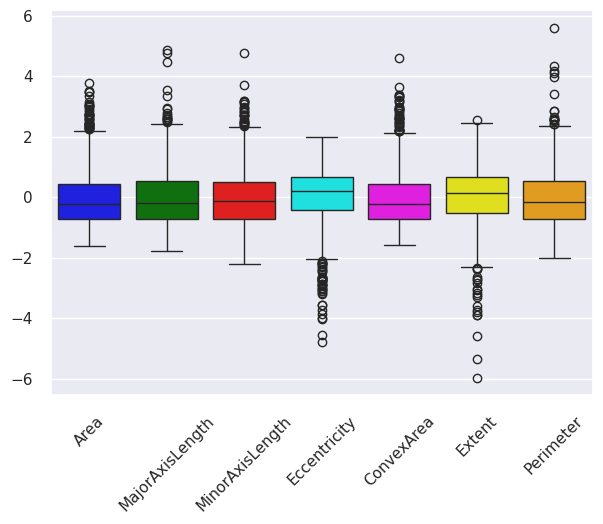

In [213]:
custom_palette1 = ['blue', 'green', 'red','cyan','magenta','yellow','orange']
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette=custom_palette1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

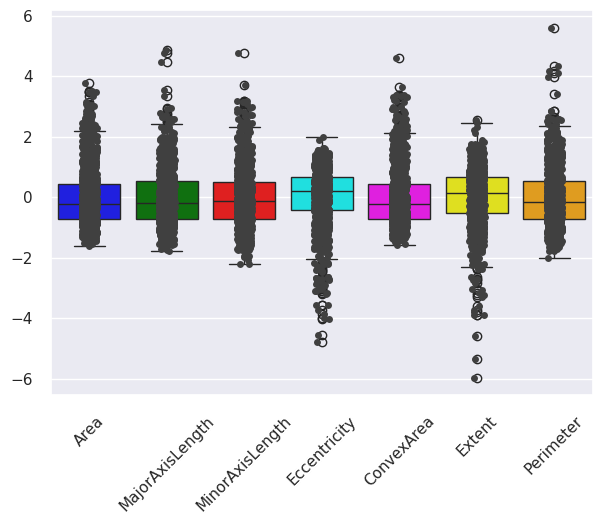

In [214]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette=custom_palette1)
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

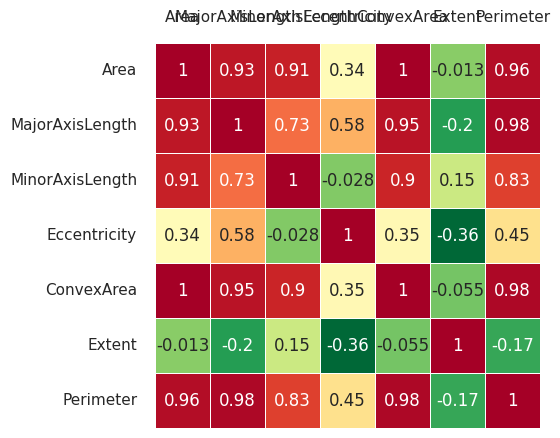

In [215]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#**Principal Component Analysis (PCA)**


Text(0, 0.5, '')

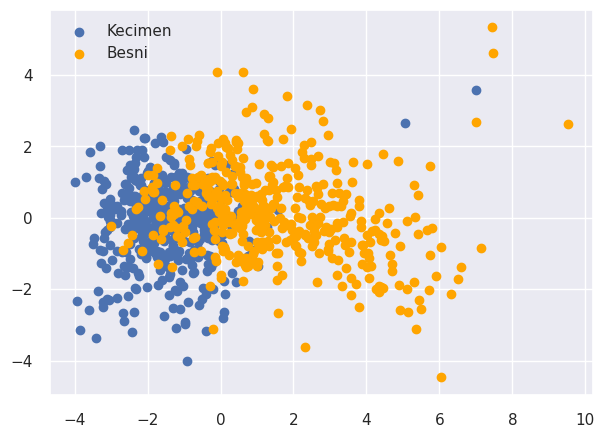

In [216]:
pca = PCA()
Z = pca.fit_transform(X)
y =df['class']
# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Kecimen = np.where(y == 0)
idx_Besni = np.where(y == 1)
#idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Kecimen,0], Z[idx_Kecimen,1], c='b', label='Kecimen')
plt.scatter(Z[idx_Besni,0], Z[idx_Besni,1], c='orange', label='Besni')
#plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend()
plt.xlabel('')
plt.ylabel('')

**Eigenvectors**

[[ 0.44828422 -0.11609991  0.00548378 -0.11113906 -0.61104765 -0.09983439
  -0.62436686]
 [ 0.4432398   0.13658724 -0.10054797  0.49520464  0.08757032 -0.68557712
   0.22772863]
 [ 0.38938118 -0.37492246  0.23604354 -0.6558767   0.38457775 -0.2390332
   0.12995283]
 [ 0.20297098  0.61082321 -0.62852206 -0.42629865  0.07510412  0.05356014
   0.02044403]
 [ 0.45093833 -0.08761633  0.0366724   0.0558117  -0.39241075  0.47120104
   0.63914127]
 [-0.05636836 -0.66734439 -0.73198093  0.10905256  0.05685884  0.02345199
  -0.00161639]
 [ 0.45082374  0.03417227  0.04430077  0.3398651   0.5551508   0.48726906
  -0.36399975]]


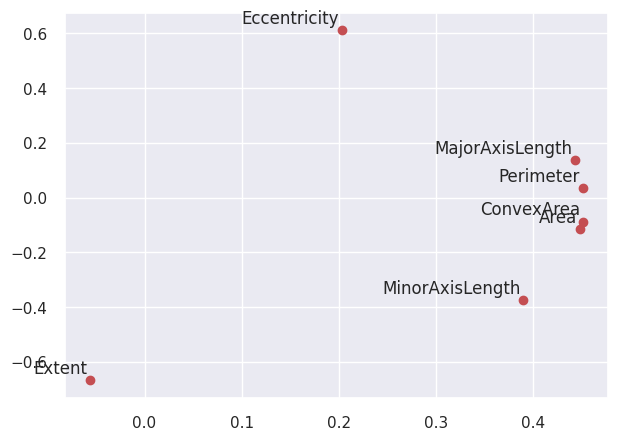

In [217]:
A = pca.components_.T
print (A)
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('')
plt.ylabel('')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

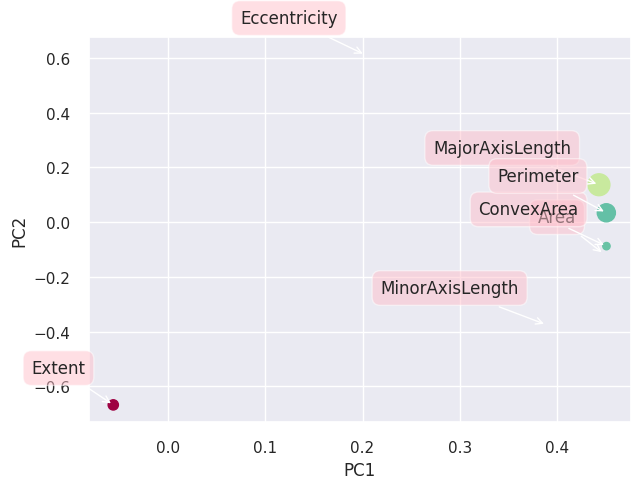

In [218]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('PC1')
plt.ylabel('PC2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='pink', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

[4.83766379e+00 1.45480489e+00 6.29148522e-01 5.68877209e-02
 2.18325269e-02 6.43734371e-03 1.01163378e-03]


Text(0, 0.5, 'Explained variance')

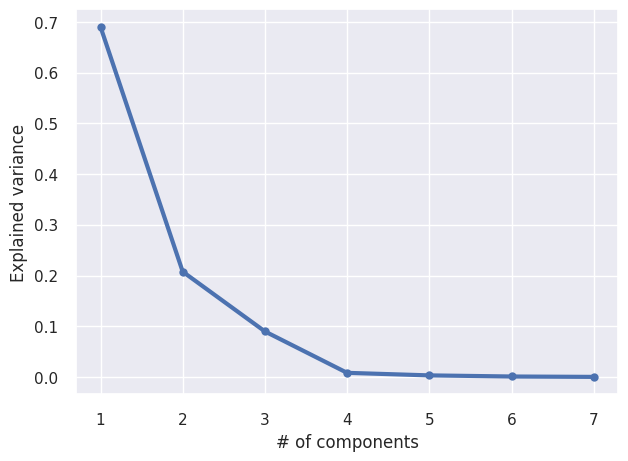

In [219]:
#Eigenvalues
Lambda = pca.explained_variance_
print(Lambda)
#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'bo-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('# of components')
plt.ylabel('Explained variance')

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

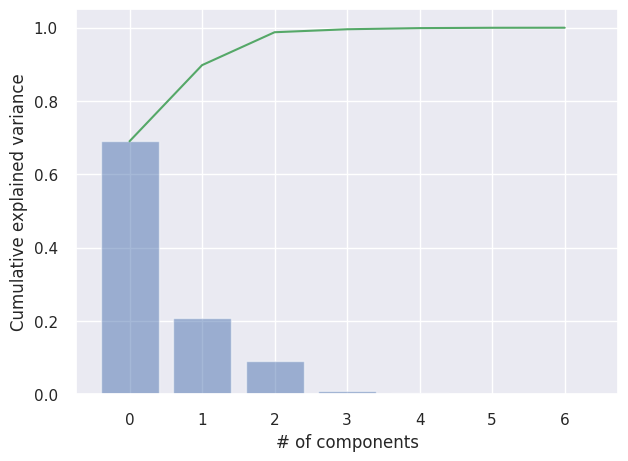

In [220]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell), 'g')
plt.xlabel('# of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

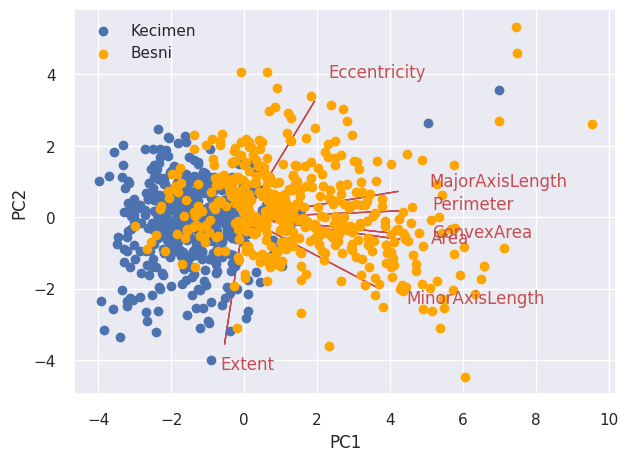

In [221]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]


y =df['class']
idx_Kecimen = np.where(y == 0)
idx_Besni = np.where(y == 1)


plt.figure()
plt.xlabel('PC1')
plt.ylabel('PC2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='r', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='r')

plt.scatter(Z[idx_Kecimen,0], Z[idx_Kecimen,1], c='b', label='Kecimen')
plt.scatter(Z[idx_Besni,0], Z[idx_Besni,1], c='orange', label='Besni')

plt.legend(loc='upper left')

#**Using PCA Library**


In [222]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [223]:
out['PC']

PC1       PC2       PC3
0    0.076994 -0.453328 -1.089214
1   -0.475376  0.445368  0.016372
2    0.372109  0.802008  0.786487
3   -2.622445 -0.302564  0.482721
4   -0.962054 -2.967763  0.452154
..        ...       ...       ...
895 -0.114629  0.694645  0.129914
896  0.273577  0.953934  0.696489
897  0.682451 -1.308199  0.091732
898  0.648410  0.979248  0.091413
899  0.487555  2.108116 -0.191941

[900 rows x 3 columns]

**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.58%] of the variance'}, xlabel='PC1 (69.0% expl.var)', ylabel='PC2 (20.7% expl.var)'>)

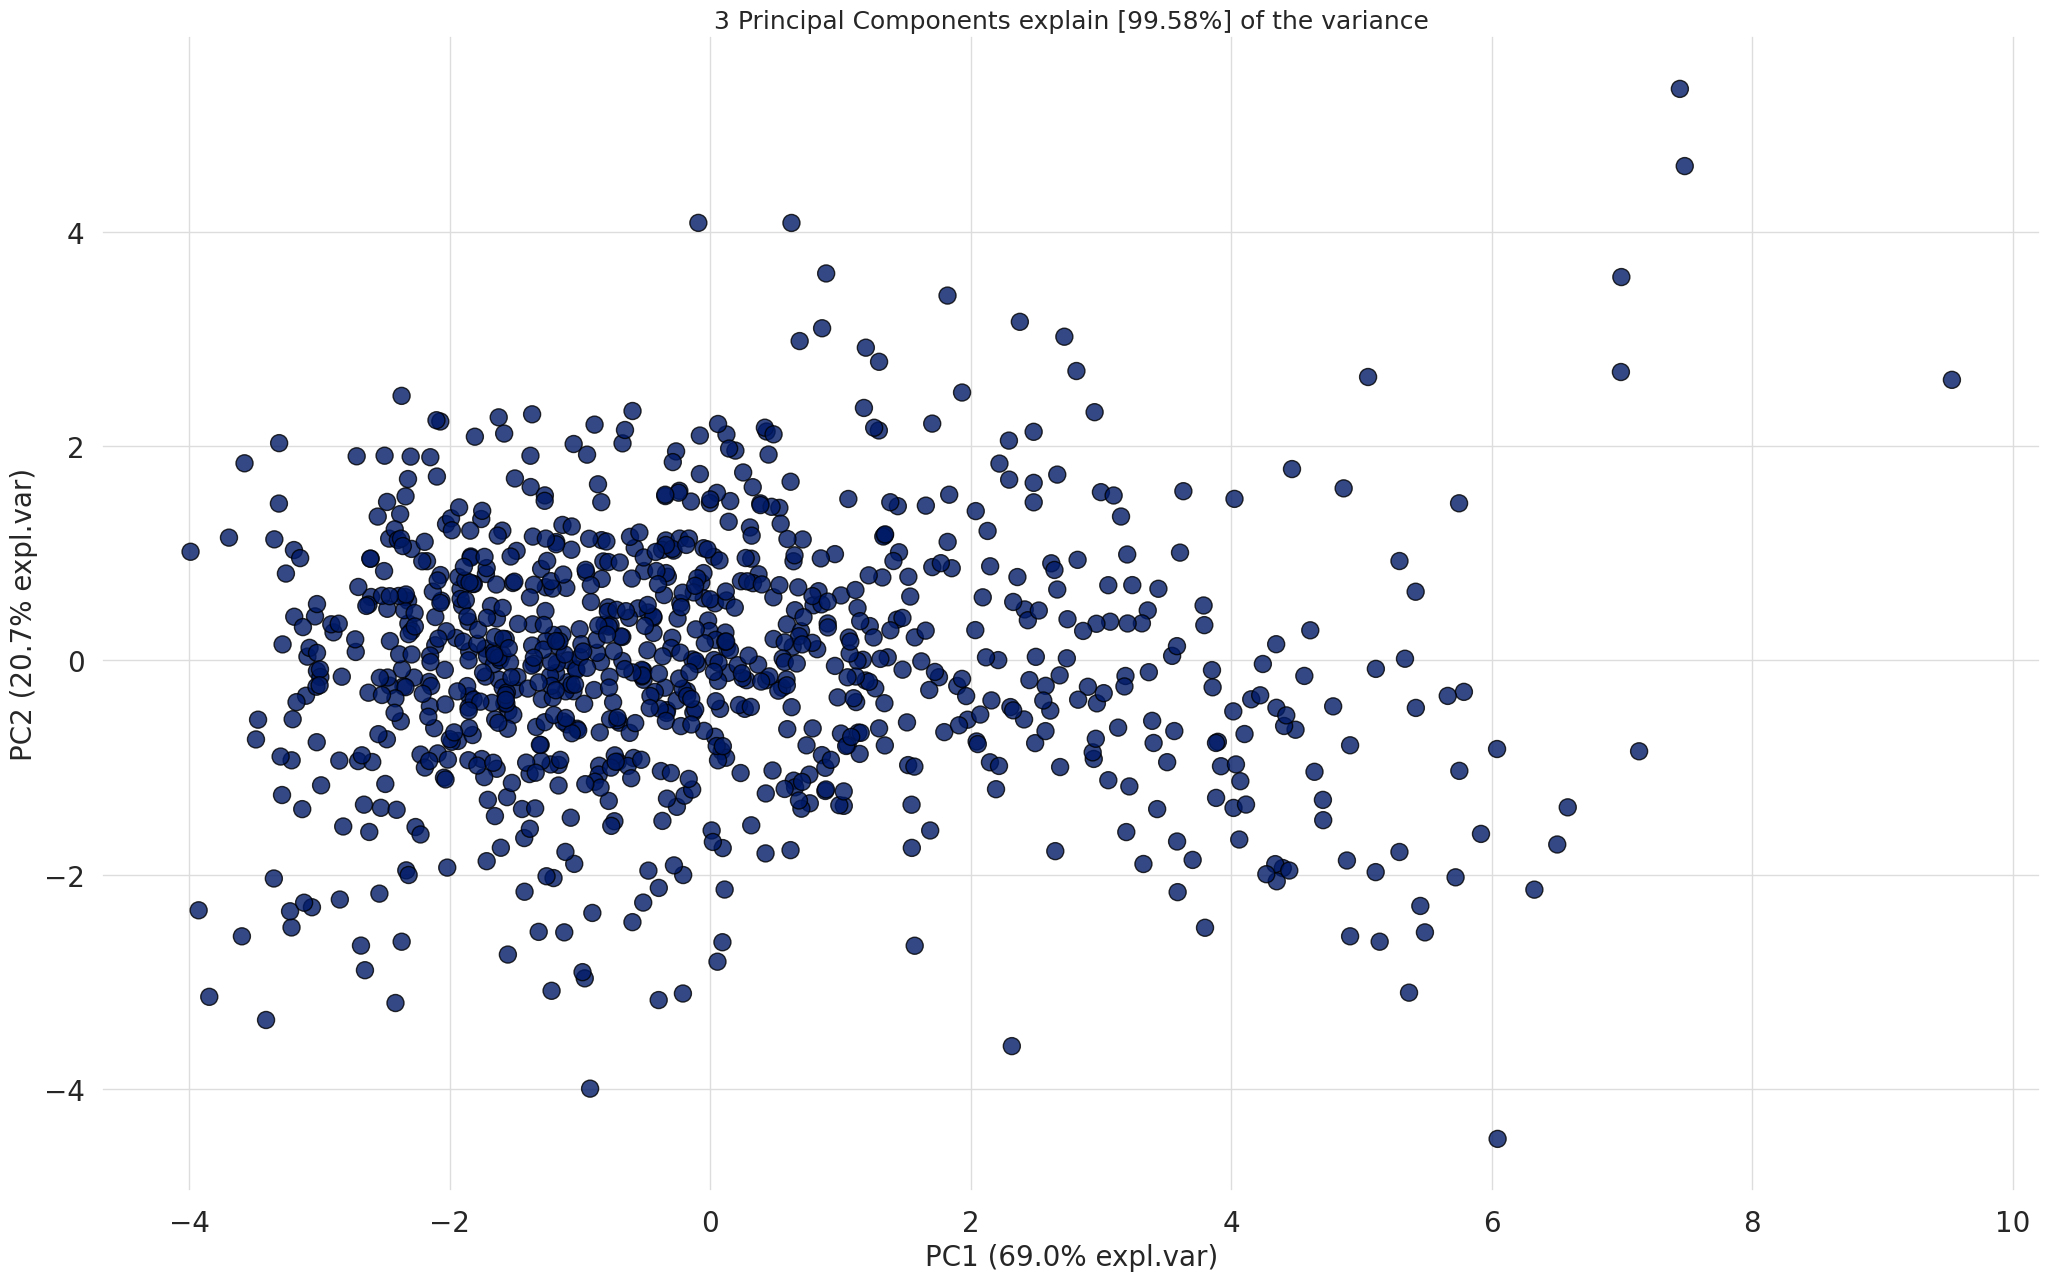

In [224]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [225]:
A = out['loadings'].T
A

PC1       PC2       PC3
Area             0.448284 -0.116100  0.005484
MajorAxisLength  0.443240  0.136587 -0.100548
MinorAxisLength  0.389381 -0.374922  0.236044
Eccentricity     0.202971  0.610823 -0.628522
ConvexArea       0.450938 -0.087616  0.036672
Extent          -0.056368 -0.667344 -0.731981
Perimeter        0.450824  0.034172  0.044301

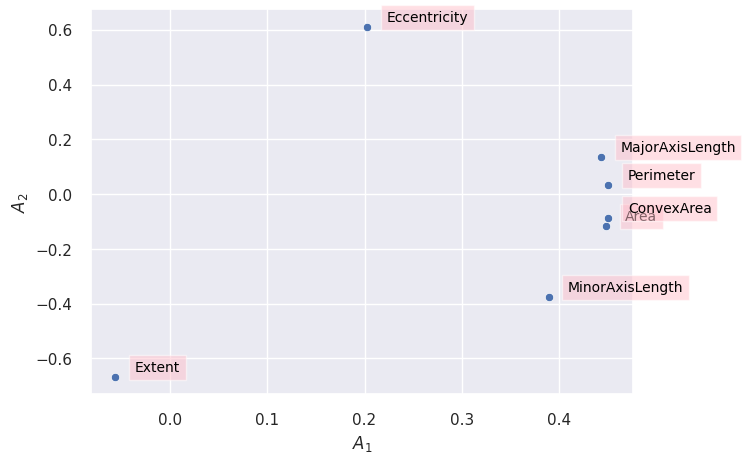

In [226]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='black',size=10),
          bbox=dict(facecolor='pink',alpha=0.5))

**Scree Plot**

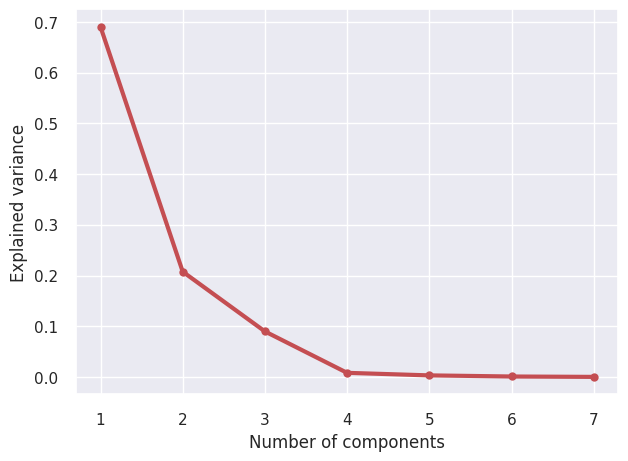

In [227]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

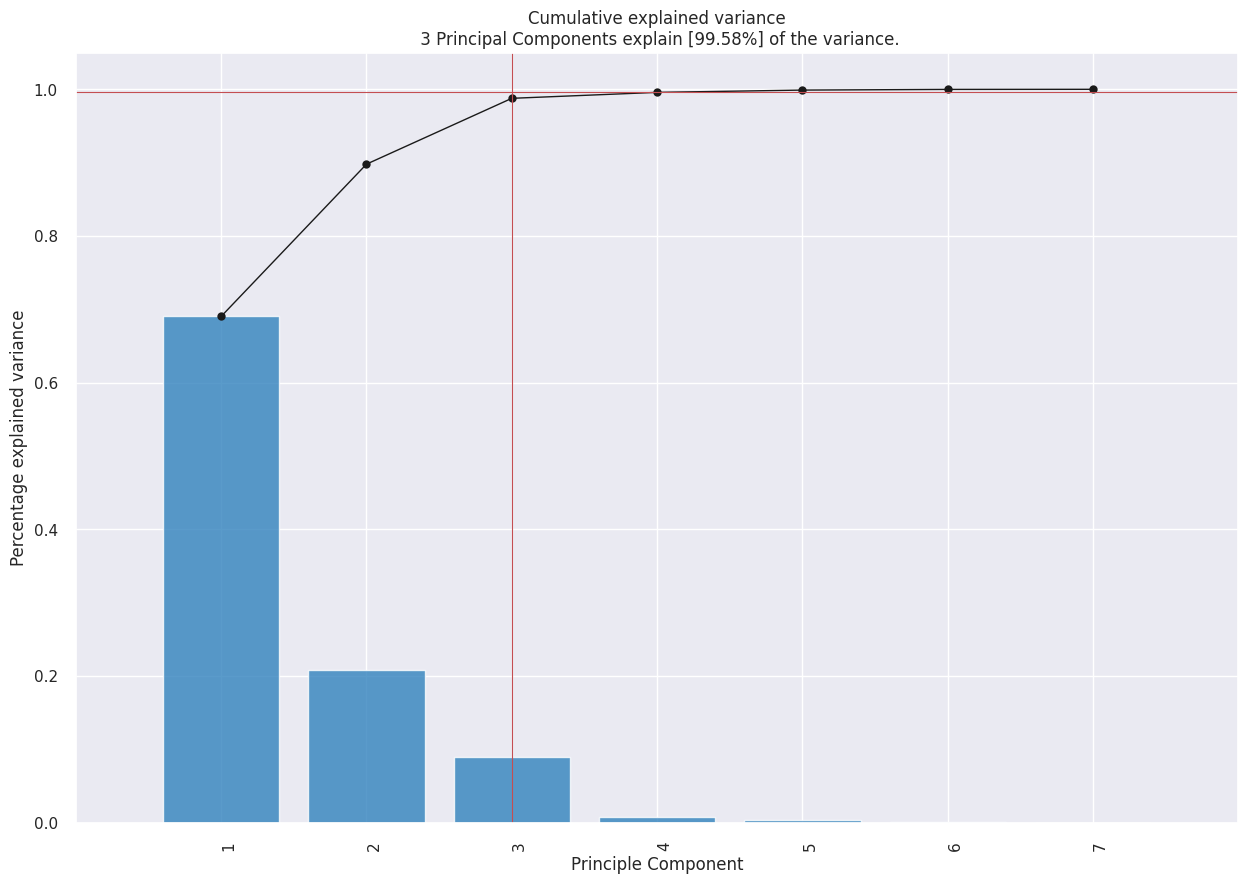

In [228]:
model.plot();

**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.58%] of the variance'}, xlabel='PC1 (69.0% expl.var)', ylabel='PC2 (20.7% expl.var)'>)

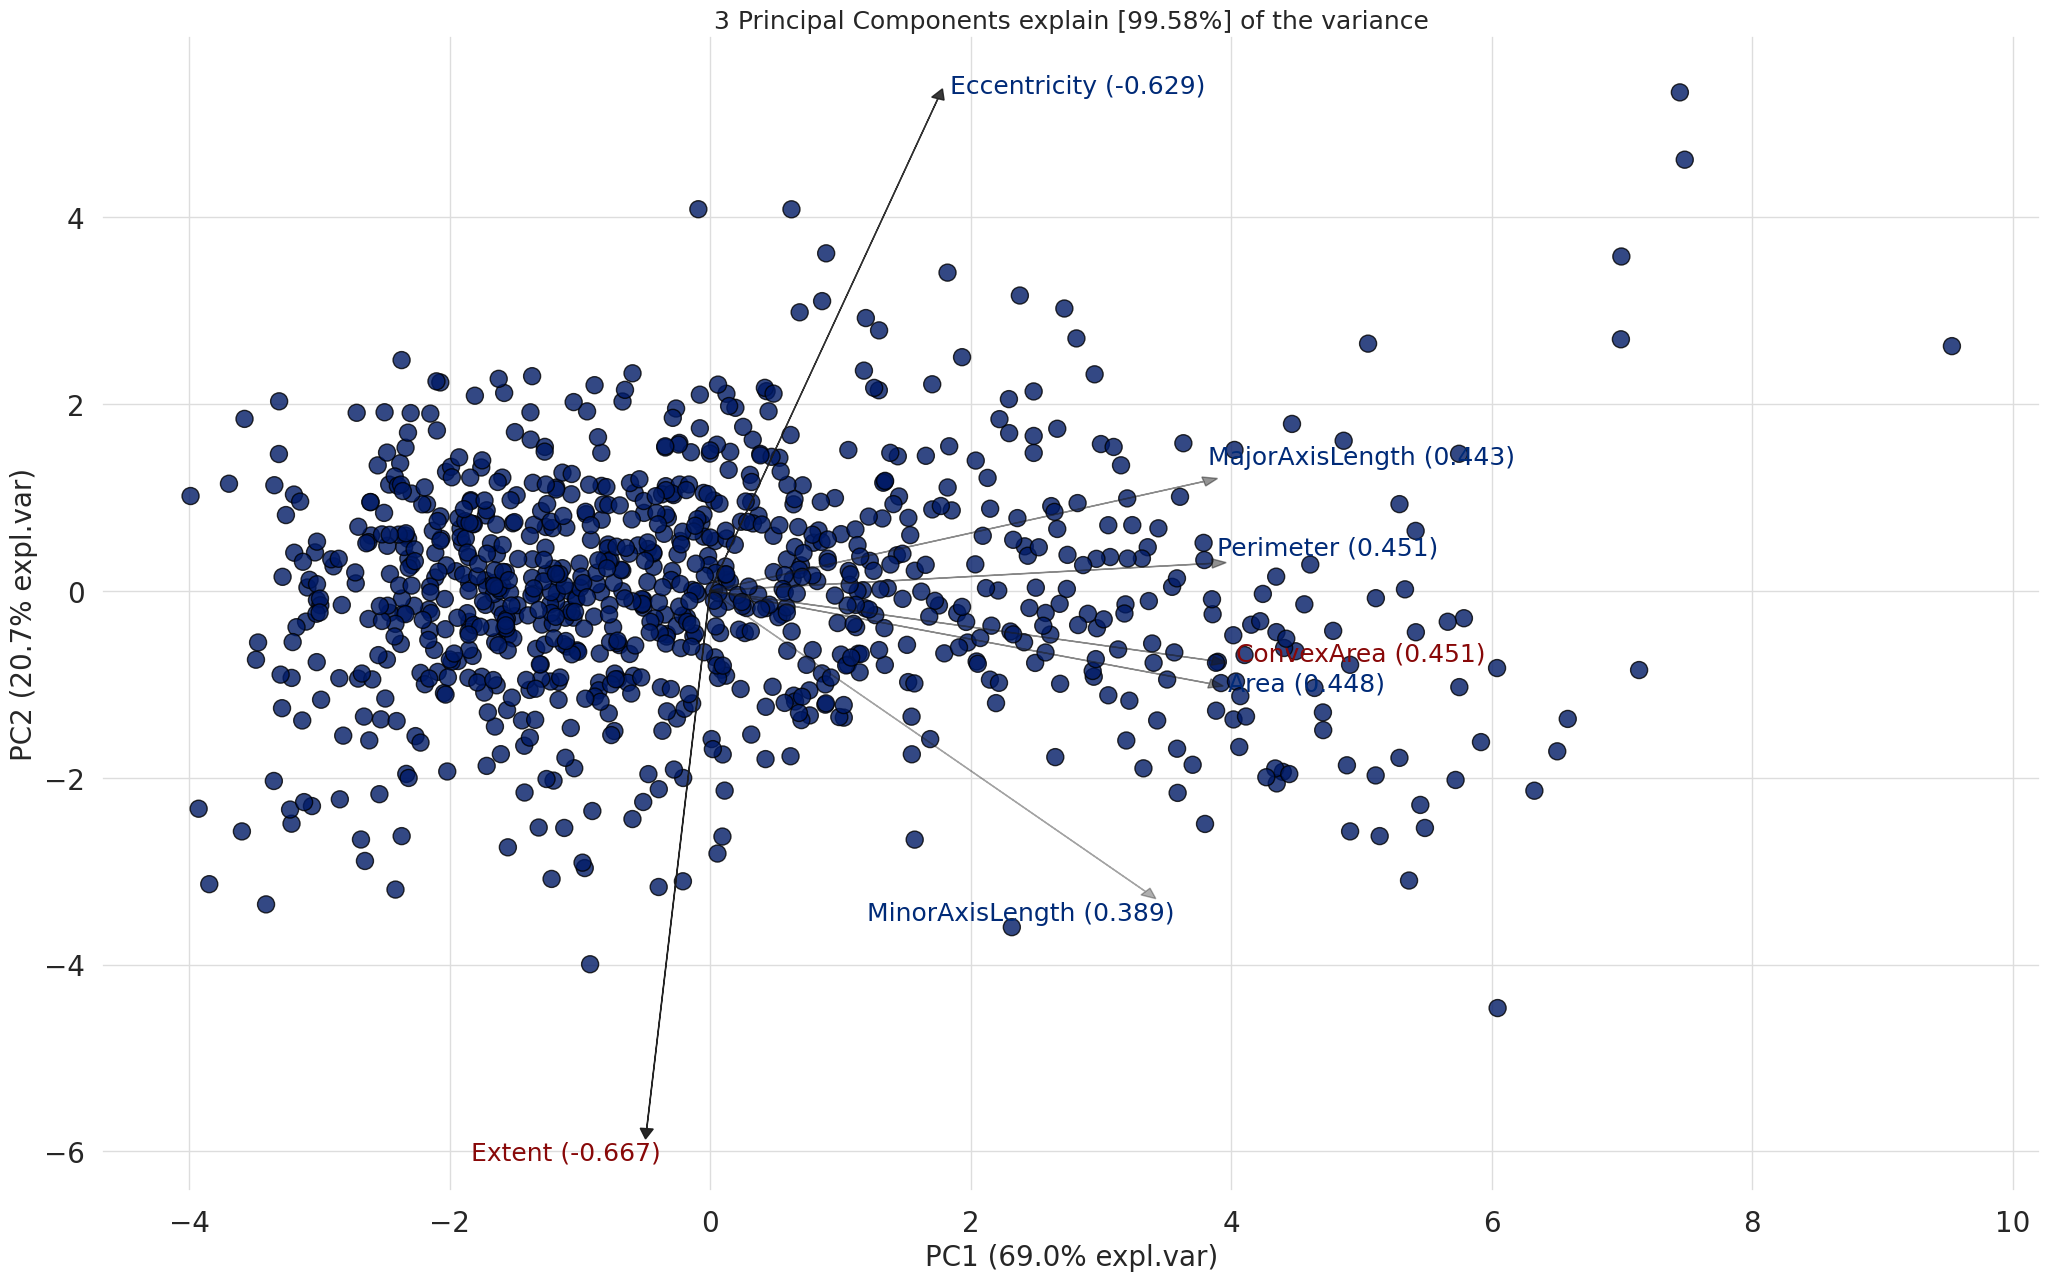

In [229]:
model.biplot(label=False, legend=False, color_arrow='k')

#**Classification Using Pycaret**

To show how the predict_model() function works with new data, we kept 21 examples separate from the main dataset. This isn't like splitting the data for training and testing, but more like pretending these 21 pieces of data were unknown when we first did the machine learning experiment.

In [230]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (810, 8)
Unseen Data For Predictions: (90, 8)


In [231]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

**Comparing All Models**

In [232]:
 #show the best model and their statistics
 best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [234]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Create a Model**

**Create Logistic Regression Model**

In [235]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [236]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune Logistic Regression Model**

In [237]:
tuned_lr = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [238]:
#tuned model object is stored in the variable 'tuned_nb'.
tuned_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression Model**

In [239]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Quadratic Discriminant Analysis Model**

In [240]:
qda = create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [241]:
qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

**Tune Quadratic Discriminant Analysis Model**

In [242]:
tuned_qda = tune_model(qda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Quadratic Discriminant Analysis Model**

In [243]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Ridge Classifier Model**

In [244]:
ridge = create_model('ridge')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [245]:
ridge

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

**Tune Ridge Classifier Model**

In [246]:
tuned_ridge = tune_model(ridge)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Ridge Classifier Model**

In [247]:
evaluate_model(tuned_ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create K Neighbors Model**

In [248]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune K Neighbors Model**

In [249]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,30,1)})

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate K Neighbors Model**

In [250]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Tune the Best Model**

In [251]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [252]:
tuned_best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

In [253]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Classification + PCA**

In [254]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

**Comparing Models**

In [255]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

**Best model with PCA**

In [256]:
best_model_pca

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

**Tune Best Model**

In [257]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [258]:
tuned_best_model_pca

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

**Evaluate Best Model**

In [259]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [260]:
lr_pca = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Model**

In [261]:
tuned_lr_pca = tune_model(lr_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Model**

In [262]:
tuned_lr_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [263]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Quadratic Discriminant Analysis Model**

In [264]:
qda_pca = create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune model**

In [265]:
tuned_qda_pca = tune_model(qda_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Model**

In [266]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.47,
                              store_covariance=False, tol=0.0001)

In [267]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Ridge Classifier Model**

In [268]:
ridge_pca = create_model("ridge")

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune model**

In [269]:
tuned_ridge_pca = tune_model(ridge_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Model**

In [270]:
tuned_ridge_pca

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

In [271]:
evaluate_model(tuned_ridge_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Explainable AI with Shapley values**

In [272]:
print("Numpy version: ", np.__version__)

Numpy version:  1.25.2


In [273]:
import shap


In [274]:
et_pca = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [275]:
tuned_et_pca = tune_model(et_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [276]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=4, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0002,
                     min_samples_leaf=5, min_samples_split=9,
                     min_weight_fraction_leaf=0.0, monotonic_cst=None,
                     n_estimators=130, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [277]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**SHAP Summary Plot**

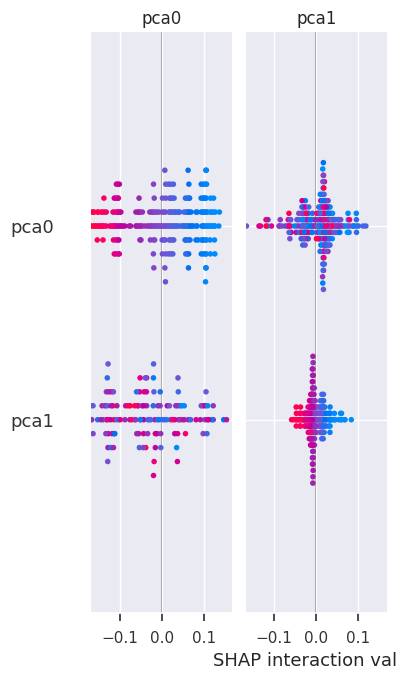

In [278]:
interpret_model(tuned_et_pca, plot='summary')

In [279]:
interpret_model(tuned_et_pca, plot='reason', observation=20)

DimensionError: Length of features is not equal to the length of shap_values!

In [280]:
interpret_model(tuned_et_pca, plot='reason')

IndexError: index 2 is out of bounds for axis 0 with size 2